In [95]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [96]:
import pandas as pd
import matplotlib as plt
import seaborn as sbn
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline

sourceFile = pd.read_csv("train.csv") #read the file where we analyze the data

sourceFile.columns #output all variable names


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

By looking at the detailed information in _data_description.txt_ we can filter the variables into a smaller and more meaningful list to aid in our calculation :
- 'OverallQual' ( albeit being too general )
- 'OverallCond' ( also quite general )
- 'YearBuilt'
- 'GrLivArea'
- 'MSZoning'

# Analyzing SalePrice and its distribution

In [97]:
sourceFile['SalePrice'].describe() #output the number of unique prices, their mean and standard deviation for further analyzing

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 As we can see, there is a sizeable difference between the minimum and maximum values for SalePrice, which might influence our calculations in a wrong way. These "out of place" values are called _outliers_ and we will get to them later.

Now we want to observe how the distribution graph looks like and find out whether the Skewness and Kurtosis is positive or negative.

Skewness is : 1.8828757597682129
Kurtosis is : 6.536281860064529


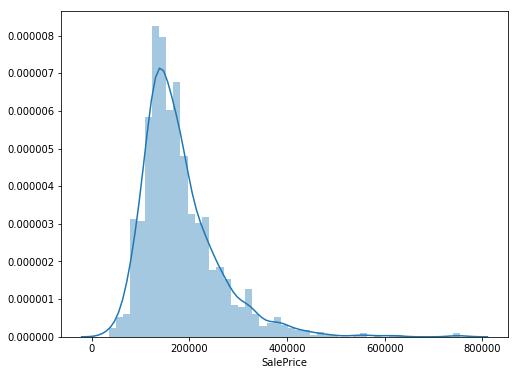

In [98]:
f, ax = plt.pyplot.subplots(figsize=(8, 6))
sbn.distplot(sourceFile['SalePrice']);
print("Skewness is :", sourceFile['SalePrice'].skew())
print("Kurtosis is :", sourceFile['SalePrice'].kurt())

A positive skewness implies that the values deviate from normal distribution and they tend to be closer to the lower bound, additionally a higher than normal kurtosis shows that that distribution has a very sharp peak thus the long tail extends beyond the mean by a few standard deviations.
Therefore we can conclude that a vast majority of houses are priced at 180921± one standard deviation ( which in our case is ~79442).

# Observing the correlation between our filtered variables and SalePrice

## Numerical variables

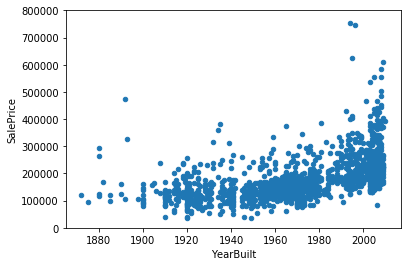

In [99]:
#scatter plot of YearBuilt/SalePrice
var = "YearBuilt"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim= (0,800000));

At a first glance we can see a weak linear relationship between the two values, additionally it seems that a vast majority of our houses are built after the '50s.

Next up is 'GrLivArea'.

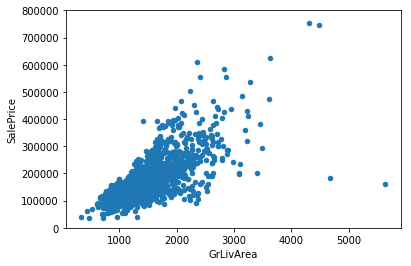

In [100]:
#scatter plot of GrLivArea/SalePrice
var = "GrLivArea"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim= (0,800000));

On the other hand, the relationship between _GrLivArea_ and _SalePrice_ denotes a strong linearity, thus this variable has a stronger impact on our sale price.

## Categorical Values

First up is _OverallQual_.

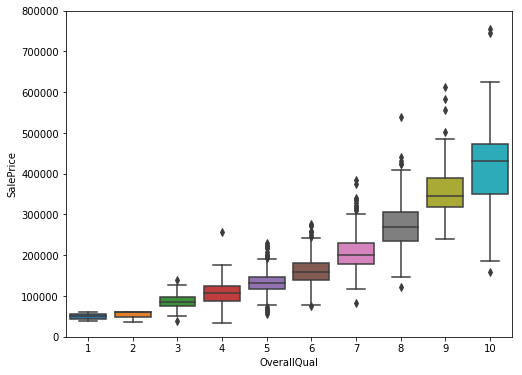

In [101]:
var = "OverallQual"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
f, ax = plt.pyplot.subplots(figsize=(8, 6))
box = sbn.boxplot(x= var, y = 'SalePrice', data = data)
box.axis(ymin = 0, ymax = 800000);

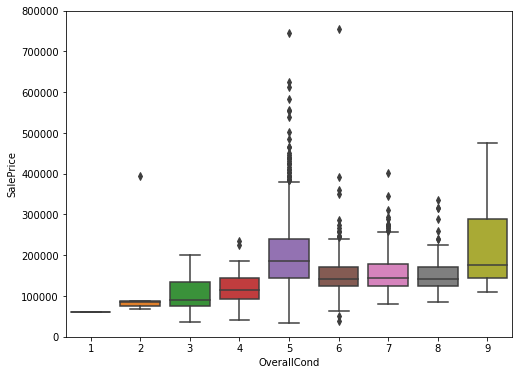

In [102]:
var = "OverallCond"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
f, ax = plt.pyplot.subplots(figsize=(8, 6))
box = sbn.boxplot(x= var, y = 'SalePrice', data = data)
box.axis(ymin = 0, ymax = 800000);

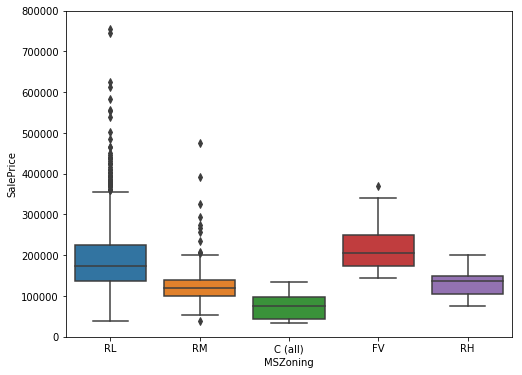

In [103]:
var = "MSZoning"
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
f, ax = plt.pyplot.subplots(figsize=(8, 6))
box = sbn.boxplot(x= var, y = 'SalePrice', data = data)
box.axis(ymin = 0, ymax = 800000);

# Observing the correlation between all variables

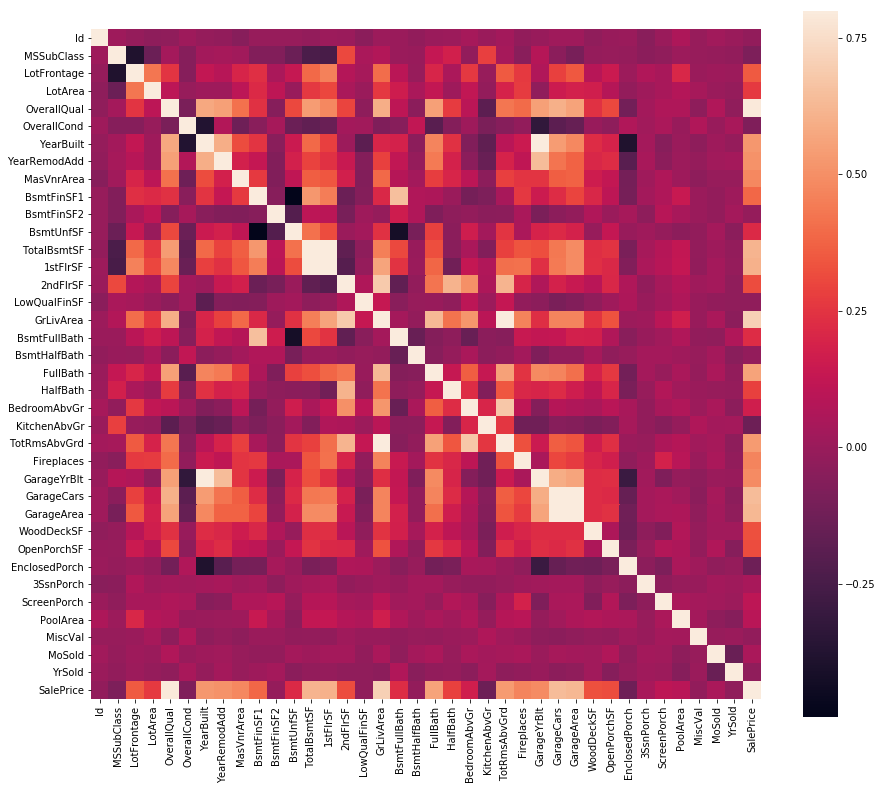

In [104]:
corrdata = sourceFile.corr()
plt.pyplot.subplots(figsize=(15, 13))
sbn.heatmap(corrdata,square = True, vmax = 0.8);

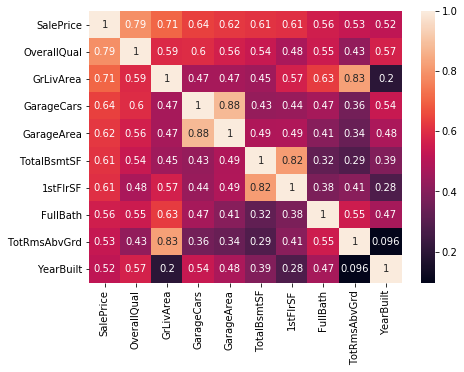

In [105]:
cols = corrdata.nlargest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(sourceFile[cols].values.T)
plt.pyplot.subplots(figsize=(7, 5))
sbn.heatmap(cm, annot = True, yticklabels = cols.values, xticklabels = cols.values);

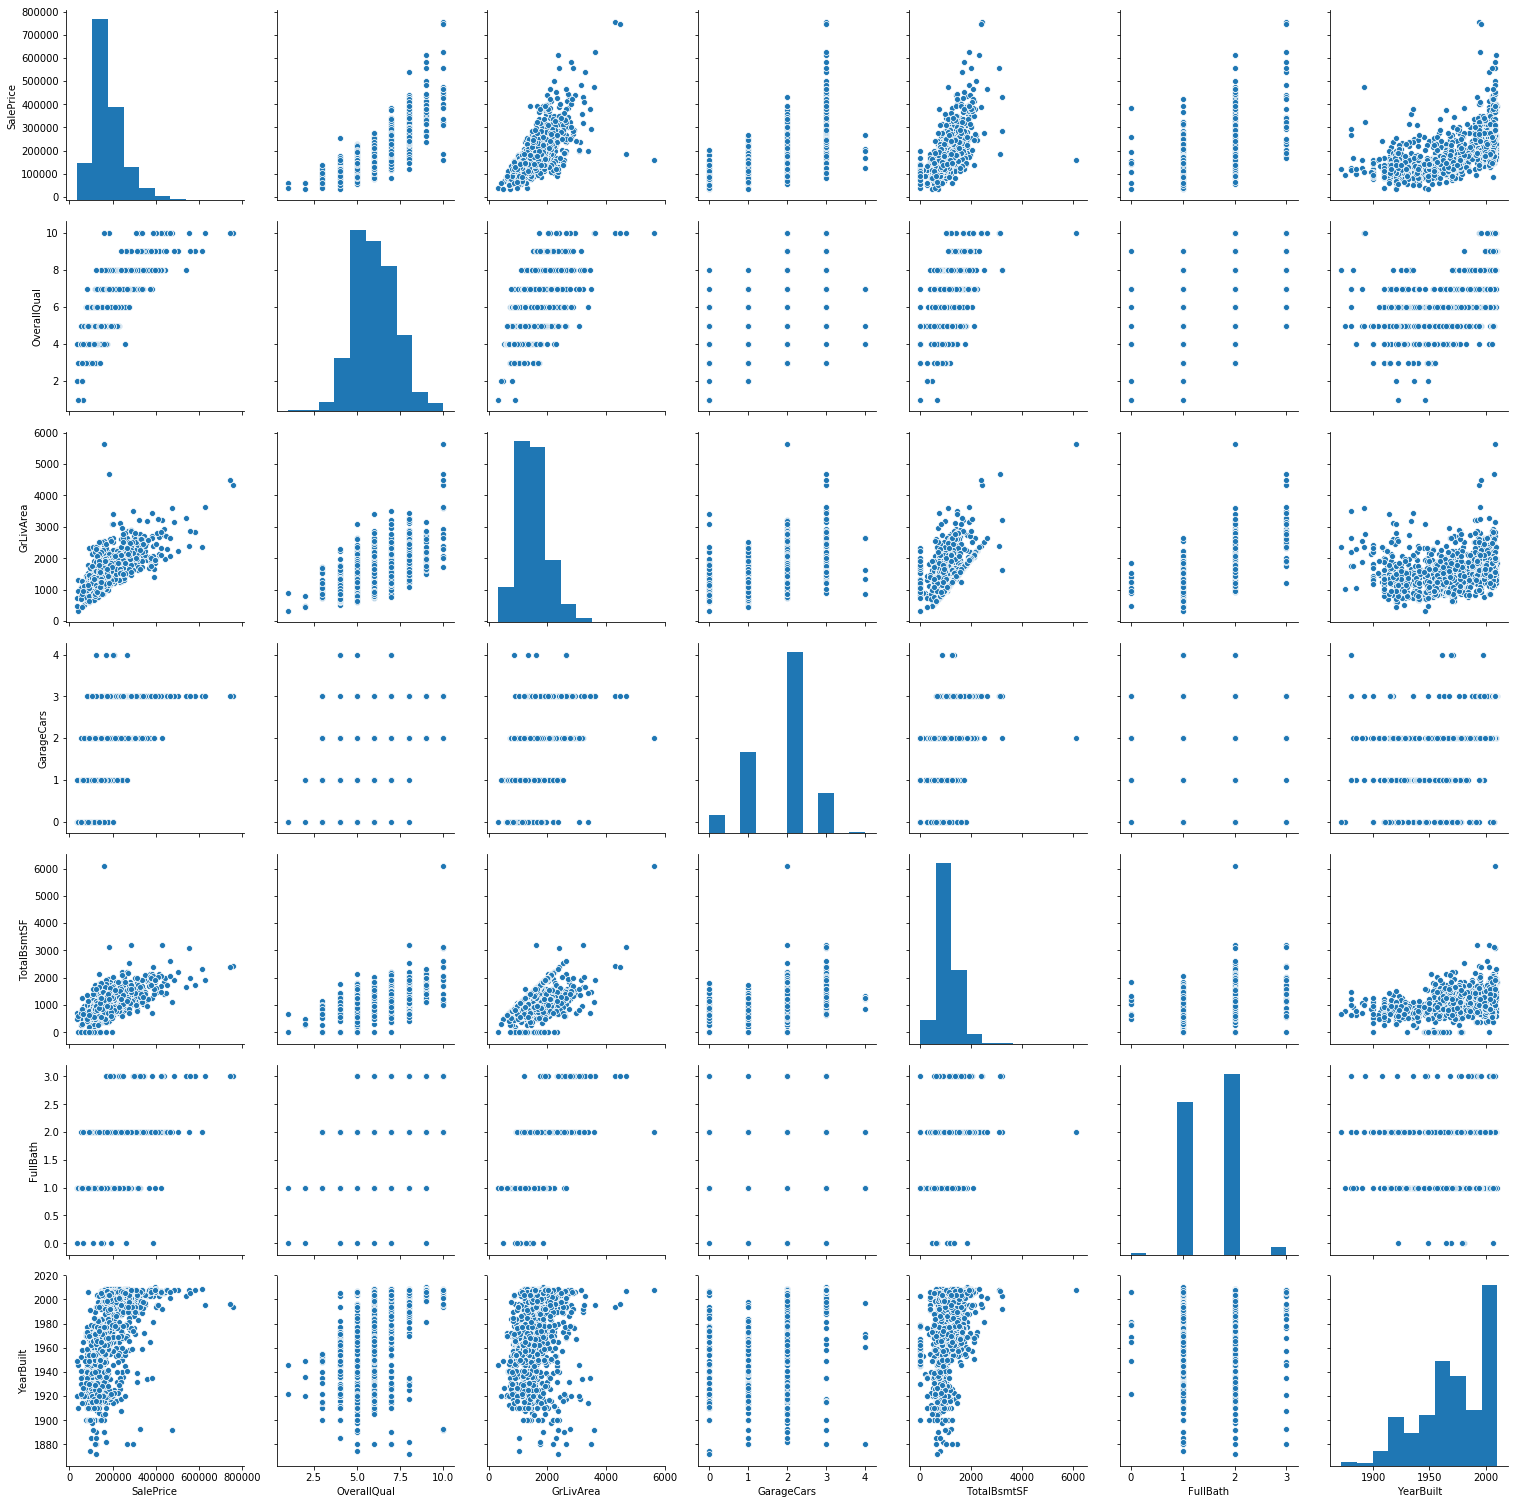

In [106]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sbn.pairplot(sourceFile[cols], size = 3);

# Missing Data

In [107]:
total = sourceFile.isnull().sum().sort_values(ascending = False)
percent = (sourceFile.isnull().sum() / sourceFile.isnull().count()).sort_values( ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

In [108]:
sourceFile = sourceFile.drop((missing_data[missing_data['Total'] > 1]).index, 1)
sourceFile = sourceFile.drop(sourceFile.loc[sourceFile['Electrical'].isnull()].index)
sourceFile.isnull().sum().max()

0

## Univariate analysis

In [109]:
saleprice_std = StandardScaler().fit_transform(sourceFile['SalePrice'][:,np.newaxis]);
low_range = saleprice_std[saleprice_std[:,0].argsort()][:10]
high_range = saleprice_std[saleprice_std[:,0].argsort()][-10:]
print('The lower range of the distribution is : \n',low_range,'\n')
print('The higher range of the distribution is : \n',high_range)

The lower range of the distribution is : 
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]] 

The higher range of the distribution is : 
 [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


## Multivariate analysis

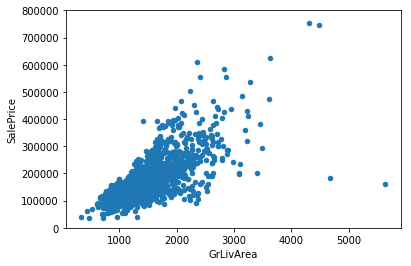

In [110]:
var = 'GrLivArea'
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

In [111]:
sourceFile.sort_values( by = 'GrLivArea', ascending = False)[:2]

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
1298  1299          60       RL    63887   Pave      IR3         Bnk   
523    524          60       RL    40094   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope    ...    EnclosedPorch 3SsnPorch  \
1298    AllPub    Corner       Gtl    ...                0         0   
523     AllPub    Inside       Gtl    ...                0         0   

     ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
1298           0      480       0       1    2008       New        Partial   
523            0        0       0      10    2007       New        Partial   

     SalePrice  
1298    160000  
523     184750  

[2 rows x 63 columns]

In [112]:
sourceFile = sourceFile.drop(sourceFile[sourceFile['Id'] == 1299].index)
sourceFile = sourceFile.drop(sourceFile[sourceFile['Id'] == 524].index)

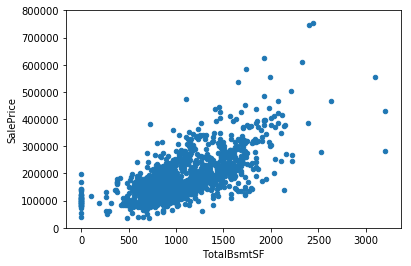

In [113]:
var = 'TotalBsmtSF'
data = pd.concat([sourceFile['SalePrice'], sourceFile[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

In [114]:
sourceFile.sort_values( by = 'TotalBsmtSF', ascending = False)[['Id','TotalBsmtSF']][:3]


Id  TotalBsmtSF
332  333         3206
496  497         3200
440  441         3094

In [115]:
sourceFile = sourceFile.drop(sourceFile[sourceFile['Id'] == 333].index)
sourceFile = sourceFile.drop(sourceFile[sourceFile['Id'] == 497].index)
sourceFile = sourceFile.drop(sourceFile[sourceFile['Id'] == 441].index)

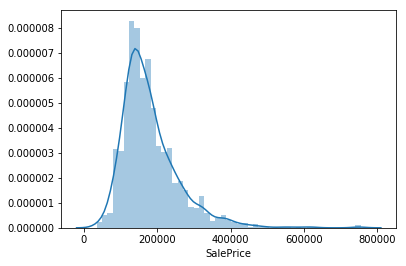

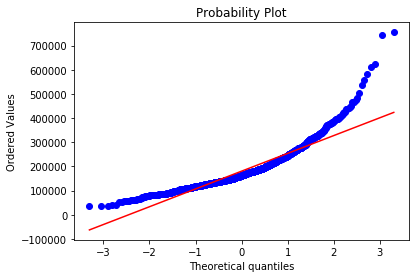

In [116]:
sbn.distplot(sourceFile['SalePrice']);
fig = plt.pyplot.figure()
stats.probplot(sourceFile['SalePrice'], plot = plt.pyplot);

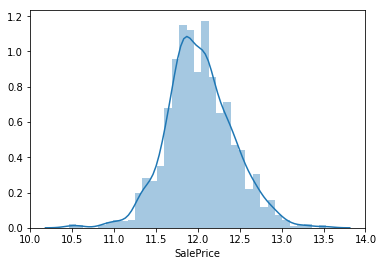

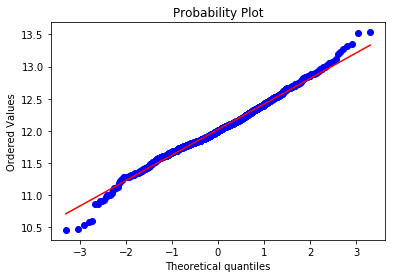

In [117]:
sourceFile['SalePrice'] = np.log1p(sourceFile['SalePrice'])
sbn.distplot(sourceFile['SalePrice']);
fig = plt.pyplot.figure()
stats.probplot(sourceFile['SalePrice'], plot = plt.pyplot);

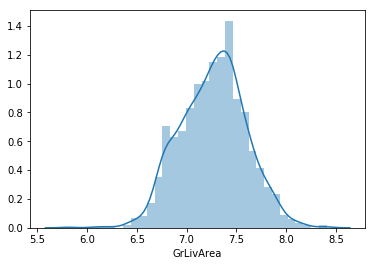

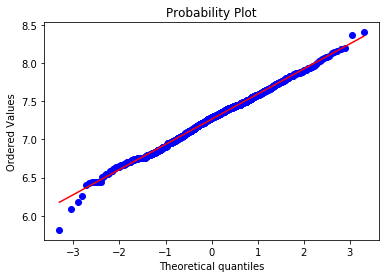

In [118]:
sourceFile['GrLivArea'] = np.log1p(sourceFile['GrLivArea'])
sbn.distplot(sourceFile['GrLivArea'])
fig = plt.pyplot.figure()
stats.probplot(sourceFile['GrLivArea'], plot = plt.pyplot);

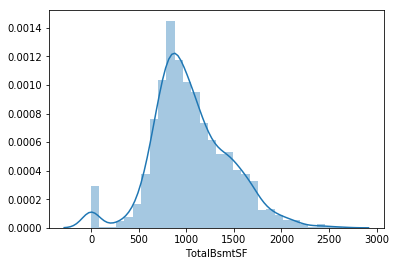

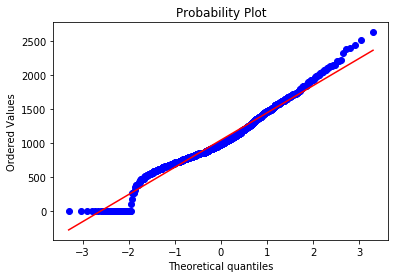

In [119]:
sbn.distplot(sourceFile['TotalBsmtSF'])
fig = plt.pyplot.figure()
stats.probplot(sourceFile['TotalBsmtSF'], plot = plt.pyplot);

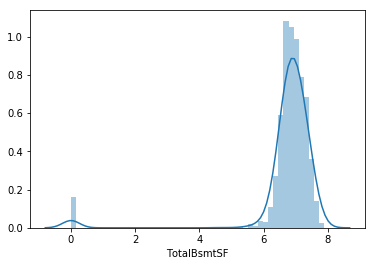

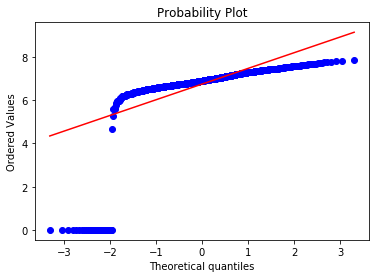

In [120]:
sourceFile['TotalBsmtSF'] = np.log1p(sourceFile['TotalBsmtSF'])
sbn.distplot(sourceFile['TotalBsmtSF'])
fig = plt.pyplot.figure()
stats.probplot(sourceFile['TotalBsmtSF'], plot = plt.pyplot);

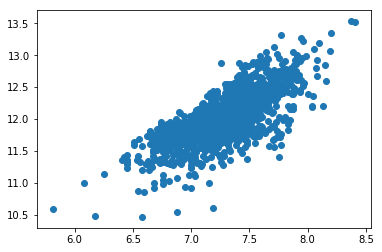

In [123]:
plt.pyplot.scatter(sourceFile['GrLivArea'], sourceFile['SalePrice']);

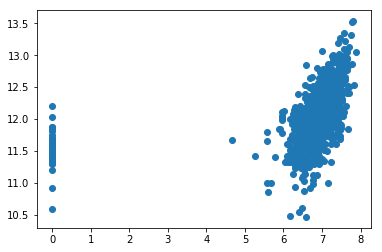

In [124]:
plt.pyplot.scatter(sourceFile['TotalBsmtSF'],sourceFile['SalePrice']);